# CS 436 / 536: Introduction to Machine Learning
## Linear Models with the MNIST Digits Dataset. Among Other Things ...

<a name="data"></a>
# Name : Ankita Patra
#B-number : B01101280
#Mail.id : apatra@binghamton.edu

In [ ]:
'''
Init

This is a HACK!

Check the execute flag
'''

execute = True

from google.colab import drive
'''
Dependencies
'''
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import permutations, combinations_with_replacement
import copy

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a name="data"></a>
# 1. Working with Data

<a name="reading"></a>
## 1.1 Reading the MNIST / USPS Handwritten Digits Dataset

In [ ]:
'''
Reading the MNIST/USPS Handwritten Digits Dataset
'''


def readData(fname='ZipDigits.train'):
    '''
    Input:
        fname: name of file containing N examples, each with d attributes
    Output:
        X: N x d+1 numpy array
        y: N x 1 numpy array
    '''
    with open(fname) as f:
        X = []
        y = []
        rlines = f.readlines()
        for line in rlines:
            row = line.rstrip().split(' ')
            yval = int(float(row[0]))
            y.append(yval)
            xvals = [float(pixel) for pixel in row[1:]]
            X.append(xvals)
        X = np.array(X)
        y = np.array(y)
        y = y.reshape((y.shape[0], 1))
        print(f'X shape: {X.shape}')
        print(f'y shape: {y.shape}')
        return X, y

In [ ]:
'''
Read training and test datasets
'''
if execute:
    Xdigitstrain, ydigitstrain = readData('/content/drive/My Drive/Colab Notebooks/ML_Assignment/ZipDigits.train')

    Ndigitstrain, pixels = Xdigitstrain.shape

    assert(Ndigitstrain == ydigitstrain.shape[0])

X shape: (7291, 256)
y shape: (7291, 1)


In [ ]:
if execute:
    Xdigitstest, ydigitstest = readData('/content/drive/My Drive/Colab Notebooks/ML_Assignment/ZipDigits.test')

    Ndigitstest, pixels = Xdigitstest.shape

    assert(Ndigitstest == ydigitstest.shape[0])

X shape: (2007, 256)
y shape: (2007, 1)


In [ ]:
'''
Show images of handwritten digits
'''


def showKthImage(X, y, k):
    image = X[k, :].reshape((16, 16))
    plt.imshow(image, cmap='gray', vmin=-1, vmax=1)
    plt.title(f'First digit is a {y[k, 0]}')
    plt.xlim(0, 15)
    plt.ylim(15, 0)
    plt.xticks(range(16))
    plt.yticks(range(16))
    plt.tight_layout()
    plt.show()

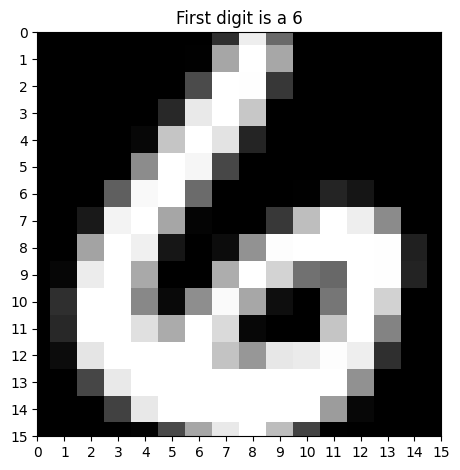

In [ ]:
if execute:
    showKthImage(Xdigitstrain, ydigitstrain, 0)

In [ ]:
'''
Computing Features
'''


def computeIntensity(X):
    '''
    Compute the average intensity feature
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        intensities: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     average pixel intesity of the corresponding image
                     See LFD Example 3.1
    '''
    print('computing intensity feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    intensities = np.matmul(X, np.ones((d, 1)))/d
    print(f'Output shape {intensities.shape}')
    return intensities


def computeSymmetry(X):
    '''
    Compute the symmetry feature
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        symmetries: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     "horizontal" symmetry of the 16 x 16 image about the vertical axis
                     See LFD Example 3.1
    '''
    print('computing symmetry feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    Ximgs = [X[n, :].reshape((16, 16)) for n in range(N)]
    Ximgs_flipped = [np.flip(Ximgs[n], axis=1) for n in range(N)]
    symmetries = [np.sum(np.abs((Ximgs[n] - Ximgs_flipped[n])
                                ).reshape(256, ))/d for n in range(N)]
    symmetries = -np.array(symmetries)
    symmetries = symmetries.reshape(N, 1)
    print(f'Output shape {symmetries.shape}')
    return symmetries

<a name="augmented"></a>
### 2.2 Compute the "Augmented Feature Matrix"

In [ ]:
'''
Computing the augmented feature matrix
'''


def computeAugmentedXWithFeatures(X):
    '''
    Compute the augmented feature matrix
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        Xaug: a 2 dimensional N x 3 numpy array
              the augmented feature matrix
              the i-th row corresponds to the i-th row of X (and image represented by it)
              the 0-th column is the column of 1s
              the 1-st column is the column of average intensities
              the 2-nd column is the column of horizontal symmetries
    '''
    N, d = X.shape
    intensity = computeIntensity(X)
    symmetry = computeSymmetry(X)
    dummy = np.ones((N, 1))
    Xaug = np.concatenate((dummy, intensity, symmetry), axis=1)
    # print(Xaug)
    print(f'Shape of augmented feature matrix: {Xaug.shape}')
    return Xaug

In [ ]:
'''
Compute the augmented matrix with features
'''

if execute:
    print('Computing augmented training feature matrix')

    Xaugtrain = computeAugmentedXWithFeatures(Xdigitstrain)

    Naugtrain, d = Xaugtrain.shape

    print('Computing augmented test feature matrix')

    Xaugtest = computeAugmentedXWithFeatures(Xdigitstest)

    Naugtest, d = Xaugtest.shape

Computing augmented training feature matrix
computing intensity feature
Input shape 7291, 256
Output shape (7291, 1)
computing symmetry feature
Input shape 7291, 256
Output shape (7291, 1)
Shape of augmented feature matrix: (7291, 3)
Computing augmented test feature matrix
computing intensity feature
Input shape 2007, 256
Output shape (2007, 1)
computing symmetry feature
Input shape 2007, 256
Output shape (2007, 1)
Shape of augmented feature matrix: (2007, 3)


<a name="1v5"></a>
### Set up the 1s vs. 5s Classification Problem

In [ ]:
'''
Create the dataset wih digits 1 and 5
'''


def indexDigits(y):
    '''
    A helper function to locate examples by label
    Input:
        y: N x 1 2 dimensional numpy array; labels for handwritten digits
    Output:
        digit_idxs: a dictionary; the keys are digits 0 -- 9
                    for a digit k, digit_idxs[k] is a list identifying the rows labeled with digit k
    '''
    N = y.shape[0]
    digit_idxs = {}
    for n in range(N):
        digit = ydigitstrain[n, 0]
        if not digit in digit_idxs:
            digit_idxs[digit] = []
        digit_idxs[digit].append(n)
    return digit_idxs

In [ ]:
'''
Construct the training and test sets for the rest of the exercises on classifying 1s vs 5s
'''

if execute:
    digit_idxs_train = indexDigits(Xaugtrain)
    X1train = Xaugtrain[digit_idxs_train[1], :]
    print(X1train)
    N1train = X1train.shape[0]
    print(f'number of 1s: {N1train}')
    X5train = Xaugtrain[digit_idxs_train[5], :]
    print(X5train)
    N5train = X5train.shape[0]
    print(f'number of 5s: {N5train}')

    Xtrain = Xaugtrain[digit_idxs_train[1]+digit_idxs_train[5], :]
    ytrain = np.concatenate(
        (np.ones((N1train, 1)), -1*np.ones((N5train, 1))), axis=0)
    Ntrain, d = Xtrain.shape
    print(f'number of 1s and 5s: {Ntrain}')
    print(f'Xtrain shape: {Xtrain.shape}, ytrain shape: {ytrain.shape}')

[[ 1.         -0.75391406 -0.1174375 ]
 [ 1.         -0.77228125 -0.16229688]
 [ 1.         -0.76925781 -0.0595    ]
 ...
 [ 1.         -0.60979297 -0.21638281]
 [ 1.         -0.66230859 -0.09282031]
 [ 1.         -0.44755859 -0.13085156]]
number of 1s: 1005
[[ 1.         -0.11173828 -0.53372656]
 [ 1.         -0.56403516 -0.40299219]
 [ 1.         -0.392      -0.3865625 ]
 ...
 [ 1.         -0.26407812 -0.662     ]
 [ 1.         -0.28941406 -0.58520312]
 [ 1.         -0.53423828 -0.51378906]]
number of 5s: 556
number of 1s and 5s: 1561
Xtrain shape: (1561, 3), ytrain shape: (1561, 1)


In [ ]:
if execute:
    digit_idxs_test = indexDigits(Xaugtest)
    Xtest = Xaugtest[digit_idxs_test[1]+digit_idxs_test[5], :]
    ytest = np.concatenate((np.ones(
        (len(digit_idxs_test[1]), 1)), -1*np.ones((len(digit_idxs_test[5]), 1))), axis=0)
    Ntest, d = Xtest.shape
    print(f'number of 1s and 5s: {Ntest}')
    print(f'Xtest shape: {Xtest.shape}, ytest shape: {ytest.shape}')

number of 1s and 5s: 428
Xtest shape: (428, 3), ytest shape: (428, 1)


<a name="scatter"></a>
### 2.3 [Visualizing Data: Plot Data Points in 2 dimensions](#scatter)

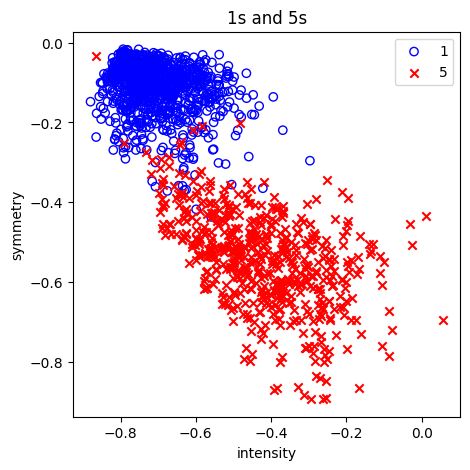

In [ ]:
'''
Plot the training data
'''

if execute:
    fig, axs = plt.subplots(figsize=(5, 5))
    axs.scatter(X1train[:, 1], X1train[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(X5train[:, 1], X5train[:, 2], marker='x', color='red', label='5')
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_title('1s and 5s')
    axs.legend()

In [ ]:
'''
Helper function to plot a linear separator
'''


def plotLinearSeparator(w, X, y, title='', Xs=None, Xlabels=None, markers=None):
    '''
    Plot data points a linear separator
    Input:
        w: a 2D (d+1) x 1 numpy array
        X: a 2D N x (d+1) numpy array
        y: a 2D N x 1 numpy array
        title: a string
    Output:
        error: misclassification error of hypothesis w on data points in X with true labels y
    '''
    '''
    Plot data points in X, y
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    fig, axs = plt.subplots(figsize=(5, 5))
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='5')
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_xlim(-1, 0.2)
    axs.set_ylim(-1, 0.1)
    '''
    Plot separator
    '''
    pltxs = np.linspace(-1, 0.21)
    pltys = - (w[0] + w[1] * pltxs) / w[2]
    axs.plot(pltxs, pltys, color='green', label='separator')
    axs.set_title(title)
    axs.legend()
    plt.show()

<a name="error"></a>
### 3.2 The Point-wise Error Function of a Linear Hypothesis for Classification

In [ ]:
def predictClassLinear(w, X):
    '''
    Input:
        w: a 2D (d+1) x 1 numpy array of weights for a linear hypothesis
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
    Output:
        yhat: an N x 1 2 dimensional numpy array orf predictions
    '''
    yhat = np.sign(np.matmul(X, w))
    return yhat

In [ ]:
import numpy as np

def error(w, x, y, R=None):
    '''
    Point-wise error measure for classification.

    Input:
        w: a d x 1 2-dimensional numpy array
        x: a d x 1 2-dimensional numpy array
        y: a scalar value
        R: Risk weights; a dictionary
           whose keys are tuples (y, yhat) with
           value equal to the cost of predicting yhat when the label is y
    Output:
        err: misclassification error of hypothesis w on data point x with true label y
    '''
    # Compute the linear score
    score = np.dot(w.T, x)[0, 0]
    # Predict yhat: treat score >= 0 as positive class (1) and score < 0 as negative class (-1)
    yhat = 1 if score >= 0 else -1

    # If risk weights are provided, use them; otherwise use standard 0-1 loss.
    if R is not None:
        err = R.get((y, yhat), 1)  # Default cost 1 if the tuple is not in the dictionary.
    else:
        err = 0 if yhat == y else 1

    return err


def E(w, X, y, R=None):
    '''
    Average error measure for classification on a dataset.

    Input:
        w: a d x 1 2-dimensional numpy array
        X: an N x d 2-dimensional numpy array
        y: an N x 1 2-dimensional numpy array
        R: Risk weights; a dictionary
           whose keys are tuples (y, yhat) with
           value equal to the cost of predicting yhat when the label is y
    Output:
        avg_error: average misclassification error of hypothesis w on data points in X with true labels y
    '''
    N = X.shape[0]
    total_error = 0.0

    # Loop over all data points
    for i in range(N):
        # Extract the i-th data point and label.
        # Reshape x to be a column vector with shape (d, 1)
        x_i = X[i].reshape(-1, 1)
        y_i = y[i, 0] if y.ndim == 2 else y[i]
        total_error += error(w, x_i, y_i, R)

    avg_error = total_error / N
    return avg_error


<a name="pocket"></a>
### 3.3 The Pocket Algorithm (and the Perceptron Learning Algorithm)


In [ ]:
'''
The Pocket algorithm (variant of the Perceptron Learning Algorithm)
'''


def pocket(X, y, max_iters=1000, w_init=None):
    '''
    Implements the Pocket algorithm
    Input:
        X: a 2D N x (d+1) numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: a 2D N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        max_iters: an integer; maximum number of iterations of PLA
        w_init: a 2D (d+1) x 1 numpy array
                intended to set initial weights for PLA
    Output:
        w_best: a 2D (d+1) x 1 numpy array, weights with lowest error on the input training set X, y
    '''
    Eins = []
    ws = []

    Ein_best = np.infty
    w_best = 0

    w = np.zeros((d, 1))
    w = w + 0.0000001
    if not isinstance(w_init, type(None)):
        w = w_init

    for i in range(max_iters):
        Ein = E(w, X, y)
        Eins.append(Ein)
        ws.append(w)
        if Ein < Ein_best:
            Ein_best = Ein
            w_best = w
        yhat = np.sign(np.matmul(X, w))
        nstar = np.where(yhat != y)[0][0]
        xstar = X[nstar, :].reshape((d, 1))
        ystar = y[nstar, 0]
        w = w + ystar * xstar

    plt.scatter(range(max_iters), Eins)
    plt.xlabel('iteration')
    plt.ylabel('in sample error')
    plt.title('PLA')
    plt.tight_layout()
    plt.show()

    print(f'Ein_best {Ein_best}, \nw_best \n{w_best}')

    return w_best

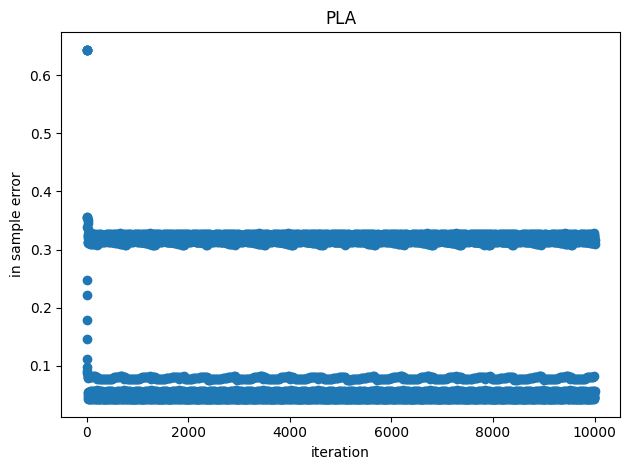

Ein_best 0.04228058936579116, 
w_best 
[[ 1.00000000e-07]
 [-2.11429287e+00]
 [ 2.92742979e+00]]


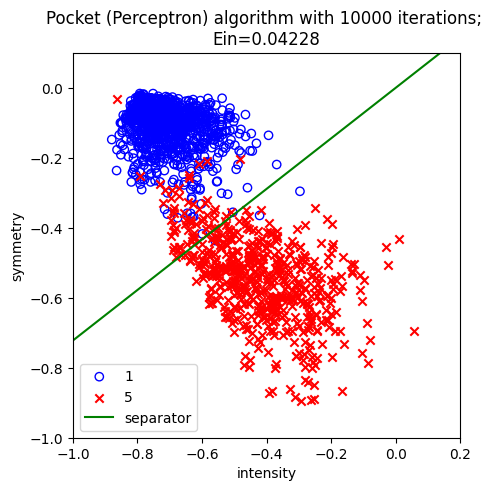

In [ ]:
'''
Run the Pocket algorithm
'''

if execute:
    max_iters = 10000
    w = pocket(Xtrain, ytrain, max_iters=max_iters)
    Ein = np.round(E(w, Xtrain, ytrain), 5)
    plotLinearSeparator(
        w, Xtrain, ytrain, title=f'Pocket (Perceptron) algorithm with {max_iters} iterations; \nEin={Ein}')

<a name="linreg"></a>
### 3.4 Linear Regression: The One Step $E_\text{in}$ Minimizing Algorit

In [ ]:
import numpy as np

def linearRegression(X, y):
    '''
    Implements the one-step algorithm for Linear Regression.

    Input:
        X: A 2D N x (d+1) numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: A 2D N x 1 numpy array
           y[i, 0] is the label associated with the i-th example

    Output:
        w_lin: The (d+1) x 1 weight vector that minimizes the sum of squared errors
               on the training set (X, y).
    '''
    # TODO: Compute the optimal weights which minimize the sum of squared errors
    # Using the normal equation: w_lin = (X^T X)^{-1} X^T y

    w_lin = np.linalg.inv(X.T @ X) @ (X.T @ y)

    return w_lin


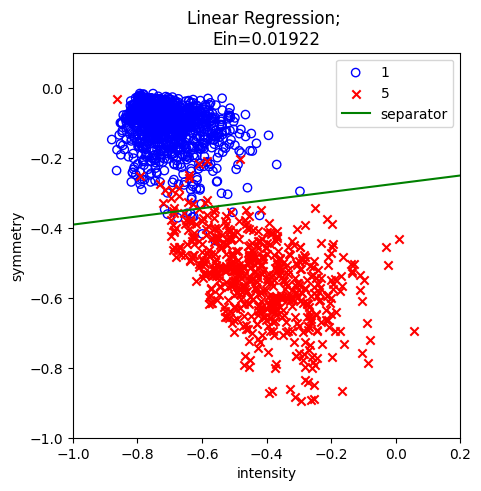

In [ ]:
'''
Run Linear Regression followed by the Pocket algorithm to classify 1s vs 5s
'''

if execute:
    w_lin = linearRegression(Xtrain, ytrain)
    Ein = np.round(E(w_lin, Xtrain, ytrain), 5)
    plotLinearSeparator(w_lin, Xtrain, ytrain,
                        title=f'Linear Regression; \nEin={Ein}')

<a name="linreg4class"></a>
#### 3.4.1 Linear Regression for Classification

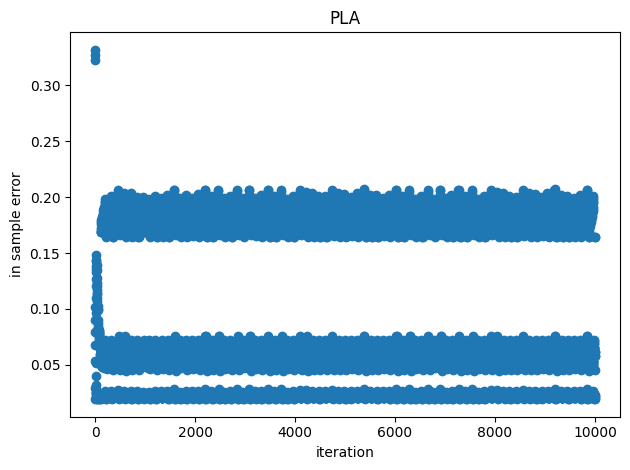

Ein_best 0.019218449711723255, 
w_best 
[[ 1.0012006 ]
 [-0.42708976]
 [ 3.6520302 ]]


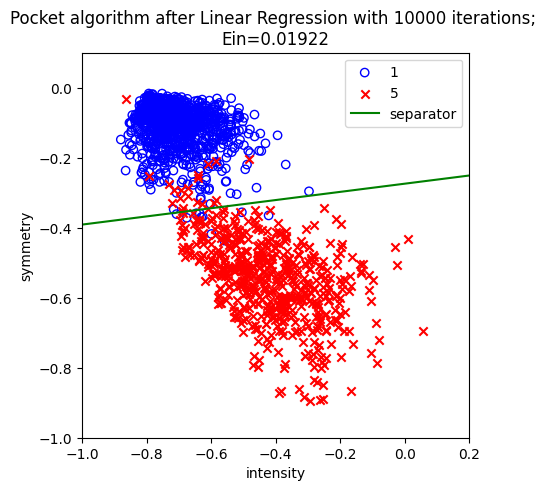

In [ ]:
'''
Linear Regression for Classification:
Use Linear Regression to obtain an initial setting of the weights for the Pocket Algorithm
'''

if execute:
    max_iters = 10000
    w = pocket(Xtrain, ytrain, w_init=w_lin, max_iters=max_iters)
    Ein = np.round(E(w, Xtrain, ytrain), 5)
    plotLinearSeparator(w, Xtrain, ytrain,
                        title=f'Pocket algorithm after Linear Regression with {max_iters} iterations; \nEin={Ein}')

<a name="logreg"></a>
### 3.5 Logistic Regression

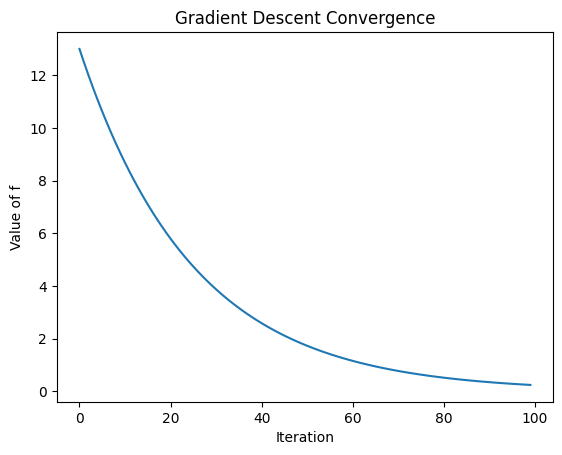

Minimum found at: (2.6021413323157403, -1.734760888210494)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def functionf(x, y):
    '''
    Computes the value of an arbitrary function in two variables at the input location.

    Here, we define:
        f(x, y) = (x - 3)^2 + (y + 2)^2
    which is minimized at (3, -2).
    '''
    return (x - 3)**2 + (y + 2)**2

def gradientf(x, y):
    '''
    Computes the gradient of an arbitrary function in two variables at the input location.

    For the function f(x, y) = (x - 3)^2 + (y + 2)^2:
        df/dx = 2*(x - 3)
        df/dy = 2*(y + 2)
    '''
    df_by_dx = 2 * (x - 3)
    df_by_dy = 2 * (y + 2)
    return df_by_dx, df_by_dy

def gradientDescent4f(x, y, eta=0.001, max_iters=100):
    '''
    Performs gradient descent to find the location at which the value of an arbitrary function is minimized.

    Parameters:
      x, y      : Initial coordinates.
      eta       : Learning rate.
      max_iters : Maximum number of iterations.

    Returns:
      The coordinates (x, y) after gradient descent.
    '''
    fvals = []
    for i in range(max_iters):
        # Evaluate the function value at the current point.
        fval = functionf(x, y)
        fvals.append(fval)
        # Compute the gradient at the current point.
        grad = gradientf(x, y)
        # TODO: Update x, y using the gradient descent update rule.
        x = x - eta * grad[0]
        y = y - eta * grad[1]

    # Plot the function value versus iterations.
    plt.plot(range(max_iters), fvals)
    plt.xlabel('Iteration')
    plt.ylabel('Value of f')
    plt.title('Gradient Descent Convergence')
    plt.show()

    return x, y

# Example usage:
initial_x = 0.0
initial_y = 0.0
final_x, final_y = gradientDescent4f(initial_x, initial_y, eta=0.01, max_iters=100)
print(f"Minimum found at: ({final_x}, {final_y})")


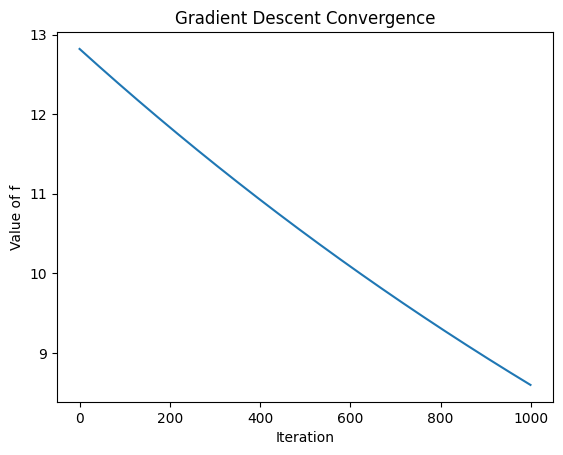

In [ ]:
if execute:
    max_iters = 1000
    eta = 0.0001
    gradientDescent4f(0.1, 0.1, eta=eta, max_iters=max_iters)

<a name="logreggrad"></a>
#### 3.5.2 Logistic Regression: Cross Entropy Error and Gradient Descent

In [ ]:
'''
The Logistic Regression algorithm with the cross entropy error measure
'''

'\nThe Logistic Regression algorithm with the cross entropy error measure\n'

In [ ]:
import numpy as np

def sigmoid(s):
    '''
    Implements the sigmoid function.

    sigmoid(s) = 1 / (1 + e^(-s))
    '''
    return 1 / (1 + np.exp(-s))


In [ ]:
import numpy as np

def gradientCrossEntropyError(w, X, y):
    '''
    Computes the gradient of the cross entropy error function on the dataset X, y at input weights w
    See LFD Exercise 3.7
    Input:
        w: a 2D (d+1) x 1 numpy array
        X: a 2D N x (d+1) numpy array
        y: a 2D N x 1 numpy array
    Output:
        gradient: a 2D (d+1) x 1 numpy array,
                  gradient of the cross entropy error function on the dataset X, y at input weights w
    '''
    N, d = X.shape
    grad = np.zeros((d, 1))

    for n in range(N):
        # Compute the dot product w^T x_n
        s = np.dot(X[n], w)
        # Calculate the sigmoid (prediction) for the current example
        pred = 1 / (1 + np.exp(-s))
        # Accumulate the gradient: (pred - y) * x_n
        grad += (pred - y[n]) * X[n].reshape(-1, 1)

    return grad


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logisticRegression(X, y, eta=0.001, w_init=None, max_iters=1000):
    '''
    Implements the gradient descent algorithm for Logistic Regression.

    Input:
        X: A 2D N x (d+1) numpy array
           - X[i, :] contains features for the i-th example.
           - X[i, 0] = 1, and X[i, 1..d] are the feature values.
        y: A 2D N x 1 numpy array
           - y[i, 0] is the label (0 or 1) for the i-th example.
        eta: Learning rate (default 0.001).
        w_init: A 2D (d+1) x 1 numpy array, initial weights (optional).
        max_iters: Maximum number of gradient descent iterations (default 1000).

    Output:
        w: A 2D (d+1) x 1 numpy array of weights.
    '''
    N, d = X.shape
    # Initialize w
    if w_init is None:
        w = np.zeros((d, 1))
    else:
        w = w_init

    Eins = []

    for i in range(max_iters):
        # --- Compute average cross-entropy error ---
        # E(w, X, y) should return the SUM of cross-entropy across all N examples.
        # So we divide by N to get the average.
        Ein = E(w, X, y) / N
        Eins.append(Ein)

        # --- Compute average gradient ---
        # gradientCrossEntropyError(w, X, y) should return the SUM of gradients across all N examples.
        # So we divide by N to get the average gradient.
        grad = gradientCrossEntropyError(w, X, y) / N

        # --- Update weights with gradient descent ---
        w -= eta * grad

    # Plot the cross-entropy error across iterations
    plt.figure(figsize=(6,4))
    plt.plot(range(max_iters), Eins, label="Training Error")
    plt.xlabel("Iteration")
    plt.ylabel("Average Cross Entropy Error")
    plt.title("Logistic Regression Training")
    plt.legend()
    plt.grid(True)
    plt.show()

    return w


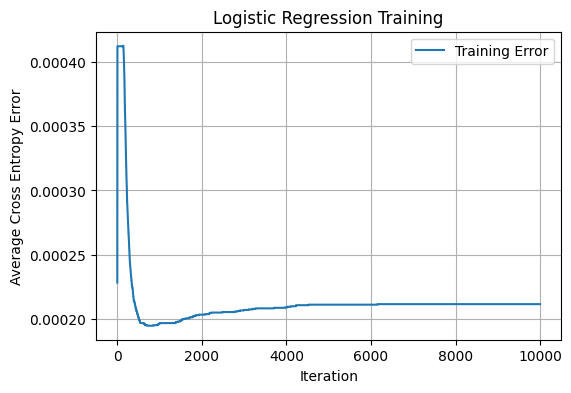

In [ ]:
'''
Run the logistic regression algorithm to classify 1s vs 5s
'''

if execute:
    max_iters = 100000
    eta = 0.1
    w_log = logisticRegression(Xtrain, ytrain, eta=eta, max_iters=max_iters)

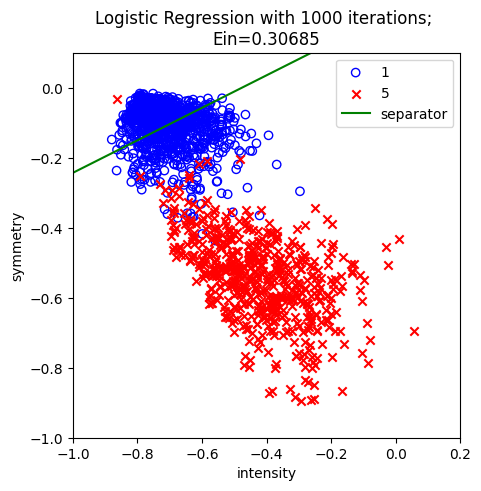

In [ ]:
if execute:
    Ein = np.round(E(w_log, Xtrain, ytrain), 5)
    plotLinearSeparator(w_log, Xtrain, ytrain,
                        title=f'Logistic Regression with {max_iters} iterations; \nEin={Ein}')

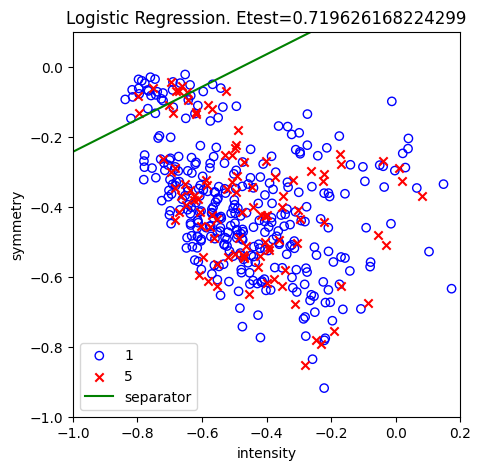

In [ ]:
if execute:
    Etest = E(w_log, Xtest, ytest)
    plotLinearSeparator(w_log, Xtest, ytest,
                        title=f'Logistic Regression. Etest={Etest}')

<a name="polytrans"></a>
## Task 4: The Polynomial Transform: $\mathcal{Z}$-space

In [ ]:
def polynomialTransform(X, Q):
    '''
    Compute the polynomial transform features
    See LFD Example 3.3
    Input:
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        Q: positive integer, the desired degree of polynomial
    Output:
        Z: A 2D N x (dtilde+1) numpy array
           The n-th row Z[n, :] contains features corresponding to the Q-th order polynomial transform of X[n, :]
           Z[n, 0] = 1
           Z[n, 1], ..., Z[dtilde] contain the transformed features
    Warning and NOTE: This is a hack! Can we do better?
    '''
    '''
    Init
    '''
    N, d = X.shape
    if np.all(X[:, 0] == np.ones((N, 1))):
        X = X[:, 1:]
    N, d = X.shape
    # NOTE: Compute the features of the Q-th order polynomial transform.
    # It may be easier to implement it only for the value of Q specified in the homework
    # instead of implementing it for all possible values of Q.
    degrees = range(Q+1)
    perms = permutations(range(d))
    perms = list(perms)
    combs = combinations_with_replacement(degrees, d)
    combs = list(combs)
    '''
    List feature names
    '''
    terms = []
    ftnames = []
    for c in combs:
        if np.sum(c) == 0:
            continue
        if np.sum(c) > Q:
            continue
        for p in perms:
            ftname = '*'.join(sorted([f'x[{p[i]}]^{c[i]}' for i in range(d)]))
            if ftname in ftnames:
                continue
            terms.append((c, p))
            ftnames.append(ftname)
    '''
    Compute features
    '''
    Z = []
    for n in range(N):
        x = X[n, :]
        z = []
        for t in terms:
            (c, p) = t
            v = np.prod([x[p[i]]**c[i] for i in range(d)])
            z.append(v)
        z = [1] + z
        Z.append(z)
    Z = np.array(Z)
    return Z

In [ ]:
if execute:
    Xdebug = [[1, 2, 3]]
    Xdebug = np.array(Xdebug)

    Z = polynomialTransform(Xdebug, 3)

    print(f'Z shape {Z.shape}')
    print(Z)

Z shape (1, 10)
[[ 1  3  2  9  4 27  8  6 18 12]]


In [ ]:
if execute:
    Q = 3
    Ztrain = polynomialTransform(Xtrain, Q)
    Ztest = polynomialTransform(Xtest, Q)

<a name="plotpoly"></a>
### 4.2 Plotting a Non-Linear Separat

In [ ]:
def plotNonLinearSeparator(w, X, y, Q=2, title=''):
    '''
    Plot the "effective" decision boundary and half spaces
    determined by a non-linear separator in 2D space
    which is picked from a linear model in higher dimensional space
    using the polynomial transform
    Input:
        w: a (d+1) x 1 2 dimensional numpy array of weights for a linear hypothesis
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        y: a 2D N x (d+1) numpy array
           y[i, 0] is the label associated with the i-th example
        Q: The desired degree of polynomial
        title: a string
    Output:
        No output
    '''
    fig, axs = plt.subplots(figsize=(5, 5))
    '''
    Plot separator
    '''
    pltx1s = np.linspace(-1, 0.21, 100)
    pltx2s = np.linspace(-1, 0.1, 100)
    pltX = np.array([[1, x, y] for x in pltx1s for y in pltx2s])
    # a function that performs the polynomial transform
    pltZ = polynomialTransform(pltX, Q=Q)
    pltyhat = predictClassLinear(w, pltZ)
    pltx1s = pltX[:, 1].reshape((pltX.shape[0], 1))
    pltx2s = pltX[:, 2].reshape((pltX.shape[0], 1))
    cmap = ListedColormap(['lightcoral', 'lightskyblue'])
    axs.scatter(pltx1s, pltx2s, c=pltyhat, cmap=cmap)
    '''
    Plot data points
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='5')
    '''
    Finishing touches
    '''
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_xlim(-1, 0.2)
    axs.set_ylim(-1, 0.1)
    axs.set_title(title)
    axs.legend()
    plt.show()

<a name="learnZ"></a>
### 4.3 Learning a Linear Separator in $\mathcal{Z}$-space, a Non-Linear Separator in $\mathcal{X}$-space

In [ ]:
'''
This is just a quick and dirty example
'''

if execute:
    w_lin = linearRegression(Ztrain, ytrain)
    Ein = np.round(E(w_lin, Ztrain, ytrain), 5)

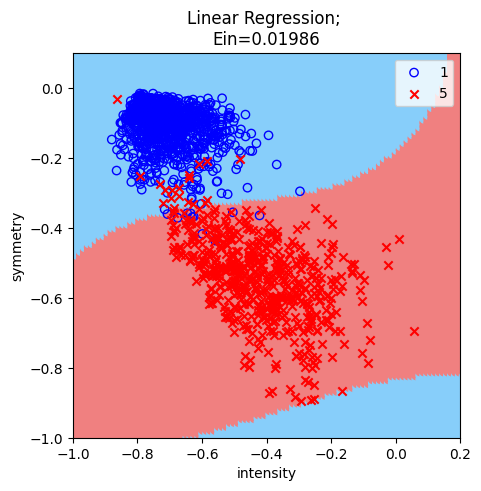

In [ ]:
if execute:
    plotNonLinearSeparator(w_lin, Xtrain, ytrain, Q=Q,
                           title=f'Linear Regression; \nEin={Ein}')